In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [6]:
wego['ADHERENCE'].max()

88.383333

In [7]:
wego['ADHERENCE'].min()

-948.533333

In [8]:
wego.groupby('ROUTE_ABBR').mean('ADHERENCE', 'SCHEDULED_HDWY')[['ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY']]

,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
ROUTE_ABBR,,,
3,-3.761491,19.523403,20.133135
7,-3.346555,22.785186,23.161475
22,-1.138107,29.992722,30.600886
23,-1.760110,18.373912,19.275453
50,-2.505022,19.528756,19.753606
52,-3.971342,19.980827,20.849976
55,-4.823302,13.581157,13.858523
56,-2.703988,13.983759,14.158662


In [9]:
wego['ACTUAL_HDWY'].max()

590.433333

In [10]:
wego['ACTUAL_HDWY'].min()

0.0

In [11]:
wego['ACTUAL_HDWY'].mean()

18.648561468875673

In [12]:
wego.groupby('ROUTE_ABBR').count()[['TRIP_ID']]

,TRIP_ID
ROUTE_ABBR,
3,47162
7,18026
22,25959
23,42108
50,43291
52,51819
55,61944
56,60020


#### 3.How does time of day or day of week affect headway and on-time performance?

In [14]:
mean = wego.groupby('SERVICE_ABBR').mean('ADHERENCE')[['ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY']]

In [15]:
mean

,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
SERVICE_ABBR,,,
1,-3.215421,16.407707,16.801986
2,-3.584496,25.150814,25.777915
3,-2.513130,25.302967,26.198863


In [16]:
wego[['SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE']]

,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ADHERENCE
0,NaN,NaN,NaN,2023-08-01 04:42:00,2023-08-01 04:37:38,-2.133333
1,NaN,NaN,NaN,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000
2,NaN,NaN,NaN,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333
3,NaN,NaN,NaN,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333
4,NaN,NaN,NaN,2023-08-01 05:15:00,2023-08-01 05:03:43,-1.583333
...,...,...,...,...,...,...
350324,30.0,35.266666,5.266666,2023-09-30 22:23:00,2023-09-30 22:31:26,-8.433333
350325,NaN,NaN,NaN,2023-09-30 22:38:00,2023-09-30 22:49:18,-11.300000
350326,30.0,31.866666,1.866666,2023-09-30 22:45:00,2023-09-30 22:49:19,-4.316666
350327,30.0,47.500000,17.500000,2023-09-30 22:59:00,2023-09-30 23:21:05,-22.083333


In [17]:
wego['DATE'] = pd.to_datetime(wego['DATE'], format = '%Y-%m-%d')

In [18]:
wego['DAY_NAME'] = wego['DATE'].dt.day_name()

In [19]:
wego


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DAY_NAME
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Saturday


In [20]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = '%Y-%m-%d %H:%M:%S')

In [21]:
wego['SCHEDULED_TIME']

0        2023-08-01 04:42:00
1        2023-08-01 04:46:00
2        2023-08-01 04:54:00
3        2023-08-01 05:10:00
4        2023-08-01 05:15:00
                 ...        
350324   2023-09-30 22:23:00
350325   2023-09-30 22:38:00
350326   2023-09-30 22:45:00
350327   2023-09-30 22:59:00
350328   2023-09-30 23:11:00
Name: SCHEDULED_TIME, Length: 350329, dtype: datetime64[ns]

In [22]:
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], format = '%Y-%m-%d %H:%M:%S')

In [23]:
wego['ACTUAL_ARRIVAL_TIME']

0        2023-08-01 04:37:38
1        2023-08-01 04:48:27
2        2023-08-01 04:54:56
3        2023-08-01 05:03:43
4        2023-08-01 05:03:43
                 ...        
350324   2023-09-30 22:31:26
350325   2023-09-30 22:49:18
350326   2023-09-30 22:49:19
350327   2023-09-30 23:21:05
350328   2023-09-30 23:31:27
Name: ACTUAL_ARRIVAL_TIME, Length: 350329, dtype: datetime64[ns]

In [24]:
wego['SCHEDULED_TIME'].dt.time

0         04:42:00
1         04:46:00
2         04:54:00
3         05:10:00
4         05:15:00
            ...   
350324    22:23:00
350325    22:38:00
350326    22:45:00
350327    22:59:00
350328    23:11:00
Name: SCHEDULED_TIME, Length: 350329, dtype: object

In [25]:
categories = {'night_time': datetime.strptime('00:00:00', '%H:%M:%S').time(), 'morning': datetime.strptime('6:00:00', '%H:%M:%S').time(), 'afternoon': datetime.strptime('12:00:00', '%H:%M:%S').time(), 'evening': datetime.strptime('18:00:00', '%H:%M:%S').time()}
morning = categories['morning'] 
afternoon = categories['afternoon']
evening = categories['evening']
night = categories['night_time']

In [26]:
wego['TIME_CATEGORY'] = wego['SCHEDULED_TIME'].apply(lambda x:'night' if x.time()<morning else
                                        'morning' if x.time()<afternoon else 'afternoon' 
                                          if x.time()<evening else 'evening')

In [27]:
wego[['SCHEDULED_TIME','TIME_CATEGORY']]

,SCHEDULED_TIME,TIME_CATEGORY
0,2023-08-01 04:42:00,night
1,2023-08-01 04:46:00,night
2,2023-08-01 04:54:00,night
3,2023-08-01 05:10:00,night
4,2023-08-01 05:15:00,night
...,...,...
350324,2023-09-30 22:23:00,evening
350325,2023-09-30 22:38:00,evening
350326,2023-09-30 22:45:00,evening
350327,2023-09-30 22:59:00,evening


In [28]:
wego['TIME_CATEGORY'].value_counts()

TIME_CATEGORY
afternoon    129696
morning      125707
evening       78392
night         16534
Name: count, dtype: int64

In [29]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  datetime64[ns]
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64 

In [30]:
mean = wego.groupby('TIME_CATEGORY').mean('ADHERENCE')[['ADHERENCE', 'SCHEDULED_HDWY',	'ACTUAL_HDWY', 'HDWY_DEV']]
mean

,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
TIME_CATEGORY,,,,
afternoon,-3.759611,15.923933,16.363452,0.535732
evening,-3.512283,24.631174,25.357819,0.673372
morning,-2.593285,15.945695,16.291556,0.419465
night,-1.717025,24.528890,25.065738,0.357731


In [31]:
wego['ADJUSTED_TOTAL'] = wego['ADJUSTED_EARLY_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_ONTIME_COUNT']

In [32]:
wego_ontime = wego.groupby('TIME_CATEGORY').sum([['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']])[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'ADJUSTED_TOTAL']]
wego_ontime

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,ADJUSTED_TOTAL
TIME_CATEGORY,,,,
afternoon,3662,26664,95212,125538
evening,1890,14392,59138,75420
morning,3398,16698,101906,122002
night,825,1284,13792,15901


In [56]:
wego_ontime['ONTIME_PCT'] = round((wego_ontime['ADJUSTED_ONTIME_COUNT']/ wego_ontime['ADJUSTED_TOTAL'])* 100)

In [62]:
wego_ontime['EARLY_PCT'] = round((wego_ontime['ADJUSTED_EARLY_COUNT']/ wego_ontime['ADJUSTED_TOTAL'])* 100)

In [64]:
wego_ontime['LATE_PCT'] = round((wego_ontime['ADJUSTED_LATE_COUNT']/ wego_ontime['ADJUSTED_TOTAL'])* 100)

In [66]:
wego_ontime

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,ADJUSTED_TOTAL,ONTIME_PCT,EARLY_PCT,LATE_PCT
TIME_CATEGORY,,,,,,,
afternoon,3662,26664,95212,125538,76.0,3.0,21.0
evening,1890,14392,59138,75420,78.0,3.0,19.0
morning,3398,16698,101906,122002,84.0,3.0,14.0
night,825,1284,13792,15901,87.0,5.0,8.0


C:\Users\hayli\AppData\Local\Temp\ipykernel_5104\2574356659.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="TIME_CATEGORY", y="ADHERENCE", data=wego, ci=None);


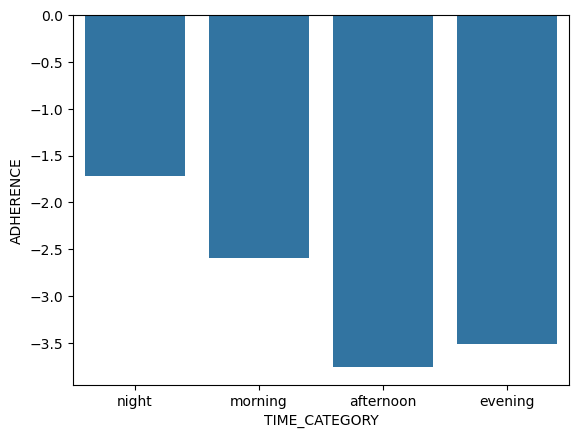

In [37]:
sns.barplot(x="TIME_CATEGORY", y="ADHERENCE", data=wego, ci=None);

C:\Users\hayli\AppData\Local\Temp\ipykernel_5104\3462714546.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="TIME_CATEGORY", y="HDWY_DEV", data=wego, ci=None);


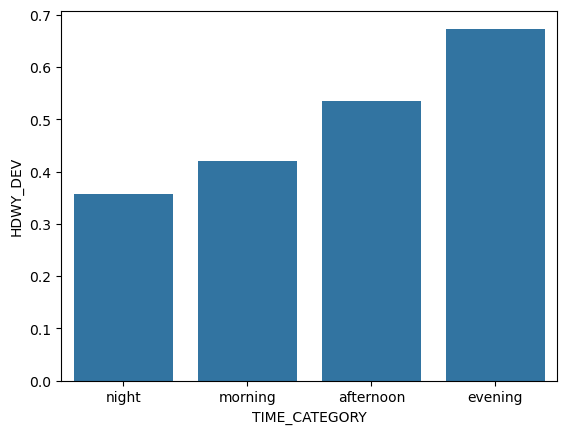

In [38]:
sns.barplot(x="TIME_CATEGORY", y="HDWY_DEV", data=wego, ci=None);

In [39]:
#1 = Weekday, 2 = Saturday, 3 = Sunday

In [41]:
wego['DATE_CATEGORY'] = wego['SERVICE_ABBR'].apply(lambda x: 'Weekday' if x == 1 else
              'Saturday' if x == 2 else
              'Sunday' if x == 3 else
              'Invalid day')

In [42]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DAY_NAME,TIME_CATEGORY,ADJUSTED_TOTAL,DATE_CATEGORY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,Tuesday,night,1,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Tuesday,night,1,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Tuesday,night,1,Weekday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,Tuesday,night,1,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,Tuesday,night,1,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,Saturday,evening,1,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,Saturday,evening,1,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Saturday,evening,1,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,Saturday,evening,1,Saturday


C:\Users\hayli\AppData\Local\Temp\ipykernel_5104\3579888816.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="DAY_NAME", y="ADHERENCE", data=wego, ci=None);


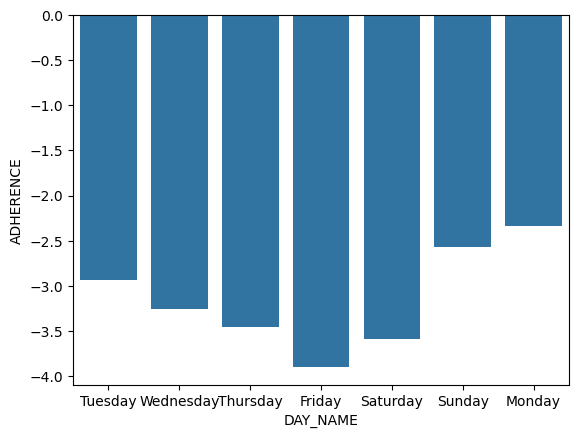

In [43]:
sns.barplot(x="DAY_NAME", y="ADHERENCE", data=wego, ci=None);

C:\Users\hayli\AppData\Local\Temp\ipykernel_5104\2725332990.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="DAY_NAME", y="HDWY_DEV", data=wego, ci=None);


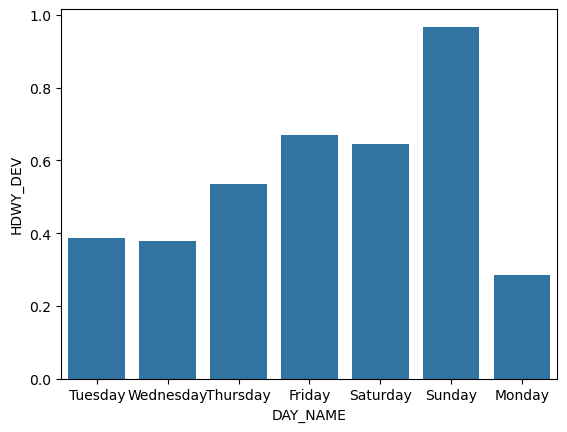

In [44]:
sns.barplot(x="DAY_NAME", y="HDWY_DEV", data=wego, ci=None);

In [45]:
wego.groupby(['OPERATOR', 'DATE']).count()[['ROUTE_ABBR']]

ROUTE_ABBR
OPERATOR DATE                  
0        2023-09-07           1
56       2023-08-18           3
235      2023-08-30          12
244      2023-09-18          25
301      2023-08-29          18
...                         ...
3156     2023-09-13          58
         2023-09-16          66
3165     2023-09-22          32
3166     2023-09-29          35
3173     2023-09-28          22

[7966 rows x 1 columns]

#### 6. How much impact does being late or too spaced out at the first stop have downstream?  

In [47]:
wego['hdwy_dev'] = wego['ACTUAL_HDWY'] - wego['SCHEDULED_HDWY']
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DAY_NAME,TIME_CATEGORY,ADJUSTED_TOTAL,DATE_CATEGORY,hdwy_dev
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,Tuesday,night,1,Weekday,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,Tuesday,night,1,Weekday,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,Tuesday,night,1,Weekday,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,Tuesday,night,1,Weekday,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,Tuesday,night,1,Weekday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,Saturday,evening,1,Saturday,5.266666
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,Saturday,evening,1,Saturday,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.0,0,0.000000,NaN,Saturday,evening,1,Saturday,1.866666
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.0,0,0.000000,NaN,Saturday,evening,1,Saturday,17.500000


In [48]:
wego_avg_ontime = f"{sum(wego['ADJUSTED_ONTIME_COUNT'])/len(wego):.0%}"
wego_avg_ontime

'77%'

In [49]:
wego_tripedge = wego[wego['TRIP_EDGE'] == 1]

In [50]:
wego_tripedge

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DAY_NAME,TIME_CATEGORY,ADJUSTED_TOTAL,DATE_CATEGORY,hdwy_dev
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,Tuesday,night,1,Weekday,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,Tuesday,night,1,Weekday,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0.0,0,13.216666,10.0,Tuesday,night,1,Weekday,2.666666
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0.0,0,10.800000,5.0,Tuesday,morning,1,Weekday,-2.166667
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,0,0.0,0,12.533333,7.0,Tuesday,morning,1,Weekday,-0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,...,0,0.0,0,8.250000,NaN,Saturday,evening,1,Saturday,1.200000
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,0,0.0,0,4.183333,5.0,Saturday,evening,1,Saturday,-1.933334
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,0,0.0,0,7.033333,NaN,Saturday,evening,1,Saturday,6.716666
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.0,0,1.966666,5.0,Saturday,evening,1,Saturday,4.916666


In [51]:
wego_tripedge.count()['ADJUSTED_LATE_COUNT',

SyntaxError: incomplete input (1516173844.py, line 1)